In [1]:
#import nltk
#nltk.download("all")

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

In [65]:
from nltk.stem import PorterStemmer
from stop_words import get_stop_words
from nltk.corpus import stopwords
from nltk import word_tokenize




In [66]:
porter_stemmer = PorterStemmer()
stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words.extend(nltk_words)

In [67]:
data = r'C:\Users\AS\Desktop\European Restaurant Reviews\European Restaurant Reviews.csv'


df = pd.read_csv(data)
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


In [68]:
#df['Sentiment'][130:150]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1502 non-null   object
 1   Restaurant Name  1502 non-null   object
 2   Sentiment        1502 non-null   object
 3   Review Title     1502 non-null   object
 4   Review Date      1502 non-null   object
 5   Review           1502 non-null   object
dtypes: object(6)
memory usage: 70.5+ KB


# null and duplicats

In [70]:
df.isna().sum()

Country            0
Restaurant Name    0
Sentiment          0
Review Title       0
Review Date        0
Review             0
dtype: int64

In [71]:
df.duplicated().sum()

49

In [44]:
#df = df.drop_duplicates()
#df.duplicated().sum()

In [45]:
df['Country'].unique() 

array(['France', 'Italy', 'Poland', 'India', 'Russia', 'Morroco', 'Cuba'],
      dtype=object)

In [46]:
print(df['Restaurant Name'].unique() )

len(df['Restaurant Name'].unique() )

['The Frog at Bercy Village' 'Ad Hoc Ristorante (Piazza del Popolo)'
 'Stara Kamienica' 'Mosaic' 'Pelmenya' 'The LOFT'
 'Old Square (Plaza Vieja)']


7

In [27]:
df['Sentiment'].unique() 

array(['Negative', 'Positive'], dtype=object)

In [28]:
#print(df['Review Title'].unique() )

len(df['Review Title'].unique())

1343

In [29]:
#df['Review Date'].unique()
len(df['Review Date'].unique())

143

In [30]:
#df['Review'].unique()
len(df['Review'].unique())

1426

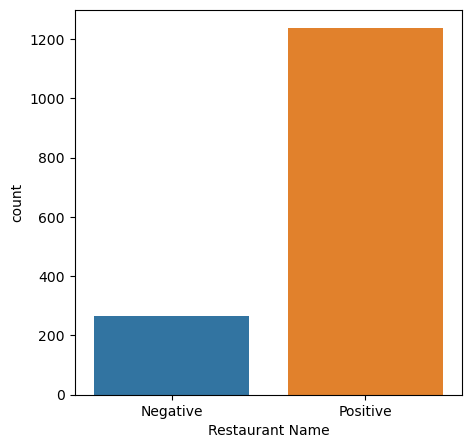

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Sentiment', data = df)
plt.xlabel('Restaurant Name')
#plt.xticks(rotation=90)
plt.show()

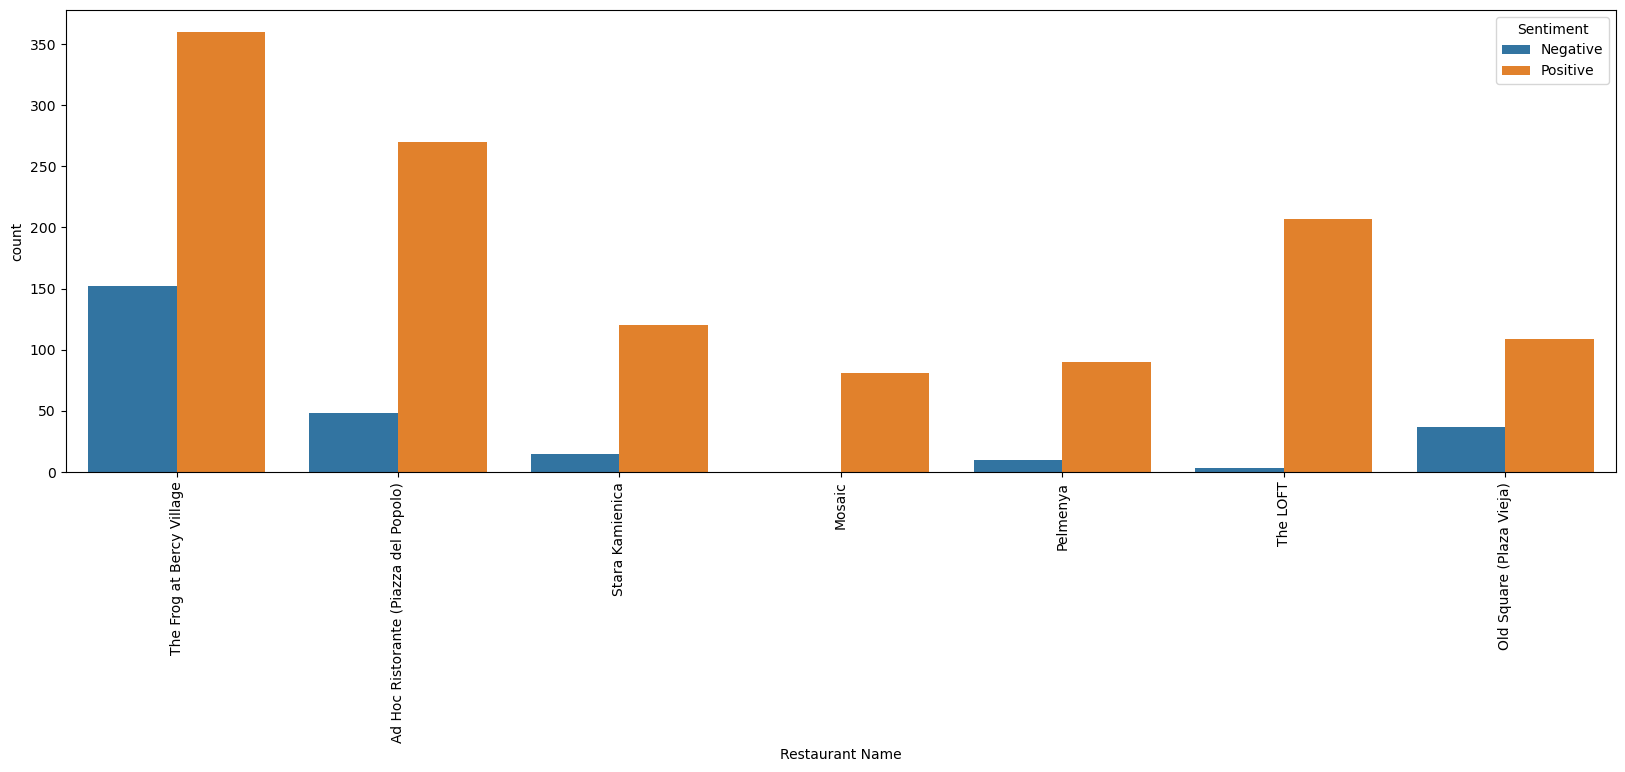

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'Restaurant Name', data = df, hue = 'Sentiment')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.show()

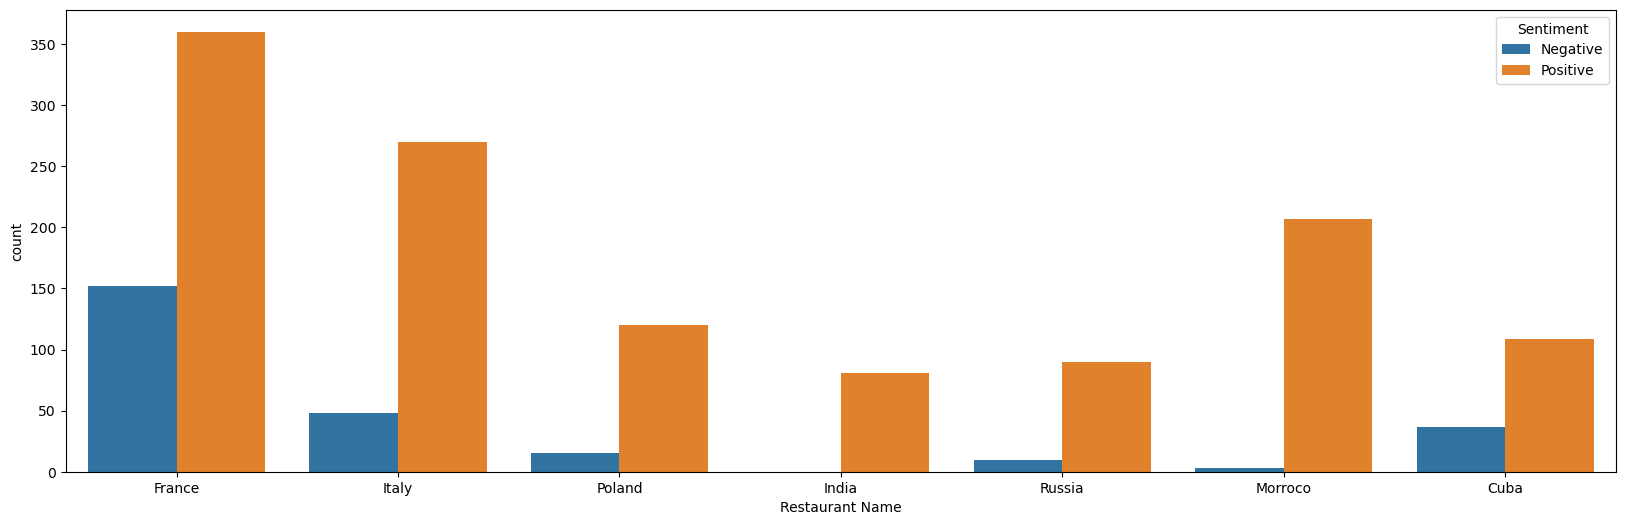

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'Country', data = df, hue = 'Sentiment')
plt.xlabel('Restaurant Name')
#plt.xticks(rotation=90)
plt.show()

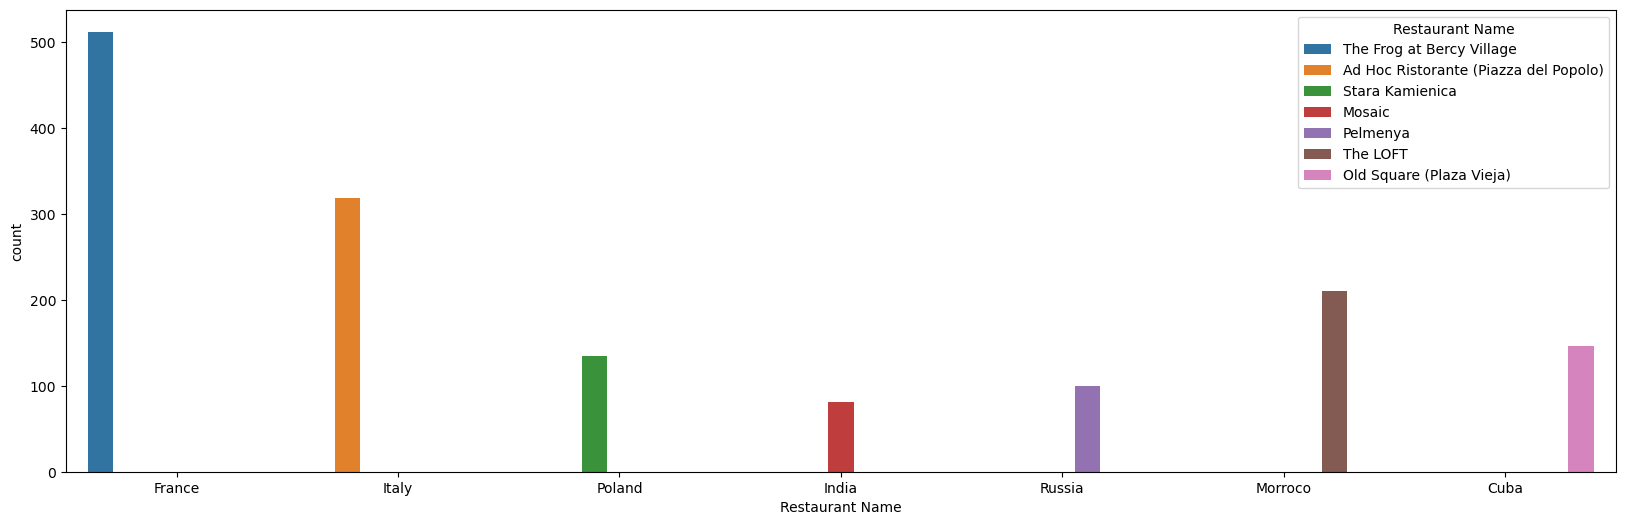

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'Country', data = df, hue = 'Restaurant Name')
plt.xlabel('Restaurant Name')
#plt.xticks(rotation=90)
plt.show()

In [72]:
df['Sentiment'] = df['Sentiment'].replace({'Negative': 0, 'Positive': 1})
df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,0,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,0,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,0,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,0,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,0,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


In [48]:
df['Sentiment'].unique()

array([0, 1], dtype=int64)

In [73]:
"""for i in range(1453):
    if df['Sentiment'][i] == 0 :
        print(i,df['Review'][i])
    else:
        print('#############################')"""

"for i in range(1453):\n    if df['Sentiment'][i] == 0 :\n        print(i,df['Review'][i])\n    else:\n        print('#############################')"

In [43]:
df['Sentiment'][140] #130 : 151

0

In [44]:
print(df.shape)

(1502, 6)


In [49]:
len(df['Sentiment'])

1453

In [50]:
type(df['Sentiment'])

pandas.core.series.Series

In [49]:
  # [] for range
  # + one or more
  # | or
  # ^ not
  # \w word

def remove_user(text):
    user = re.compile(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)")
    clean_text = user.sub(r'',text)
    return clean_text

In [50]:
# punctuation  '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
#Remove Punctuation
def remove_punctuation(text):
    without_punct ="".join(i for i in text if i not in string.punctuation)
    return without_punct

In [51]:
#Lower Case
def lower_case(text):
    return text.lower()

In [52]:
#Tokenize Text
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

In [53]:
# number
# \d digit
# + one or more
def remove_numbers(text):
    nums = re.compile(r'\d+')
    clean_text = nums.sub(r'',text)
    return clean_text

In [54]:
def remove_stopwords(text):
    not_stopword = [i for i in text  if i not in stop_words]
    return not_stopword

In [94]:
def preprocess_Review(text):
    clean_text = lower_case(remove_punctuation(remove_numbers(remove_user( convert_str(text)))))
    
    words = remove_stopwords(clean_text)
    words = tokenization(words)

    
    stemmed_words=[porter_stemmer.stem(word=words) for word in words]
     
    return ''.join(stemmed_words)

In [99]:
def convert_str(list_text):
  string = ''.join([str(item) for item in list_text])
  return string

In [85]:
string

<module 'string' from 'C:\\ProgramData\\anaconda3\\Lib\\string.py'>

In [75]:
type(df['Review'])

pandas.core.series.Series

In [77]:
df['Review']

0       The manager became agressive when I said the c...
1       I ordered a beef fillet ask to be done medium,...
2       This is an attractive venue with welcoming, al...
3       Sadly I  used the high TripAdvisor rating too ...
4       From the start this meal was bad- especially g...
                              ...                        
1497    Despite the other reviews saying that this is ...
1498    beer is good.  food is awfull  The only decent...
1499    for terrible service of a truly comedic level,...
1500    We visited the Havana's Club Museum which is l...
1501    Food and service was awful. Very pretty stop. ...
Name: Review, Length: 1502, dtype: object

In [1]:


df['CleanReview'] = df.apply(lambda row: preprocess_Review(df["Review"]), axis = 1)
df['Tokens'] = text_df.apply(lambda row: word_tokenize(row['CleanReview']), axis = 1)
#df.head(4)